### 이산형 데이터를 어떻게 처리할까?
### One-Hot Encoding

In [1]:
import pandas as pd
import numpy as np

In [3]:
edges = pd.DataFrame({'source': [0, 1, 2],
                   'target': [2, 2, 3],
                       'weight': [3, 4, 5],
                       'color': ['red', 'blue', 'blue']})

edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [5]:
edges.dtypes

source     int64
target     int64
weight     int64
color     object
dtype: object

In [7]:
pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [8]:
pd.concat([edges, pd.get_dummies(edges["color"])], axis=1)

,source,target,weight,color,blue,red
0,0,2,3,red,0,1
1,1,2,4,blue,1,0
2,2,3,5,blue,1,0


In [9]:
weight_dict = {3:"M", 4:"L", 5:"XL"}
edges["weight_sign"] = edges["weight"].map(weight_dict)
edges

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [10]:
weight_sign = pd.get_dummies(edges["weight_sign"])
weight_sign

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [17]:
pd.concat([edges, weight_sign], axis=1)

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


## Data Binning!
데이터의 구간 나누기

In [13]:
# Example from - https://chrisalbon.com/python/pandas_binning_data.html

raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


<AxesSubplot: >

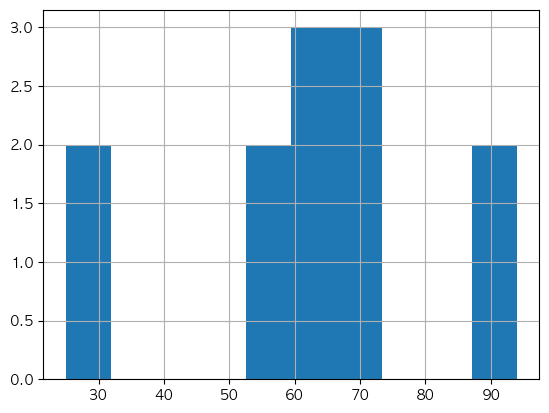

In [14]:
df["postTestScore"].hist()

In [15]:
bins = [0, 25, 50, 75, 100]
group_names = ['Low', 'Okay', 'Good', 'Great']
categories = pd.cut(df['postTestScore'], bins, labels=group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

In [16]:
df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)
pd.value_counts(df['categories'])

Good     8
Low      2
Great    2
Okay     0
Name: categories, dtype: int64

### Label encoding by sklearn
- Scikit-learn의 preprocessing 패키지도 label / one-hot 지원

In [20]:
raw_example = df.values
raw_example[:3]

array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

In [21]:
data = raw_example.copy()

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [23]:
raw_example[:,0]

array(['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons',
       'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts',
       'Scouts'], dtype=object)

In [24]:
le.fit(raw_example[:,0])

LabelEncoder()

In [26]:
le.classes_

array(['Dragoons', 'Nighthawks', 'Scouts'], dtype=object)

In [28]:
le.transform(raw_example[:,0])

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [29]:
data[:,0] = le.transform(raw_example[:,0])
data[:3]

array([[1, '1st', 'Miller', 4, 25, 'Low'],
       [1, '1st', 'Jacobson', 24, 94, 'Great'],
       [1, '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

In [30]:
label_column = [0,1,2,5]
label_enconder_list = []
for column_index in  label_column:
    le = preprocessing.LabelEncoder()
    le.fit(raw_example[:,column_index])
    data[:,column_index] = le.transform(raw_example[:,column_index])
    label_enconder_list.append(le)
    del le 
data[:3]

array([[1, 0, 4, 4, 25, 2],
       [1, 0, 2, 24, 94, 1],
       [1, 1, 0, 31, 57, 0]], dtype=object)

In [34]:
label_enconder_list[3].classes_

array(['Good', 'Great', 'Low'], dtype=object)

In [37]:
label_enconder_list[0].transform(raw_example[:10,0])

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2])

In [38]:
one_hot_enc = preprocessing.OneHotEncoder()
data[:,0].reshape(-1,1)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]], dtype=object)

In [40]:
one_hot_enc.fit(data[:,0].reshape(-1,1))

OneHotEncoder()

In [43]:
one_hot_enc.categories_

[array([0, 1, 2], dtype=object)]

In [46]:
data[:,0].reshape(-1,1)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]], dtype=object)

In [47]:
onehotlabels = one_hot_enc.transform(data[:,0].reshape(-1,1)).toarray()
onehotlabels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])